**1st version**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[Task 1] First Layer Size: 16 → Test Accuracy: 0.9420
[Task 1] First Layer Size: 32 → Test Accuracy: 0.9560
[Task 1] First Layer Size: 64 → Test Accuracy: 0.9647
[Task 1] First Layer Size: 128 → Test Accuracy: 0.9722
[Task 1] First Layer Size: 256 → Test Accuracy: 0.9768
[Task 1] First Layer Size: 512 → Test Accuracy: 0.9776


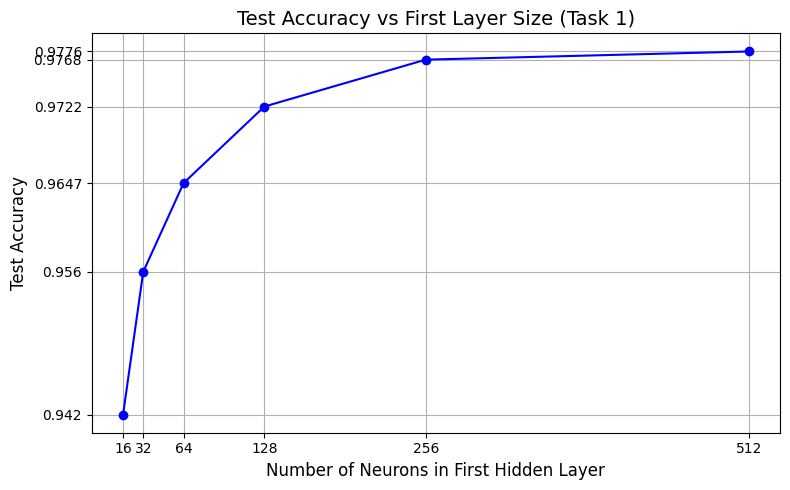

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[Task 2] Number of Layers: 2 → Layer Sizes: [512, 10] → Test Accuracy: 0.9777
[Task 2] Number of Layers: 3 → Layer Sizes: [256, 128, 10] → Test Accuracy: 0.9768
[Task 2] Number of Layers: 4 → Layer Sizes: [256, 128, 64, 10] → Test Accuracy: 0.9769
[Task 2] Number of Layers: 5 → Layer Sizes: [256, 128, 64, 32, 10] → Test Accuracy: 0.9783


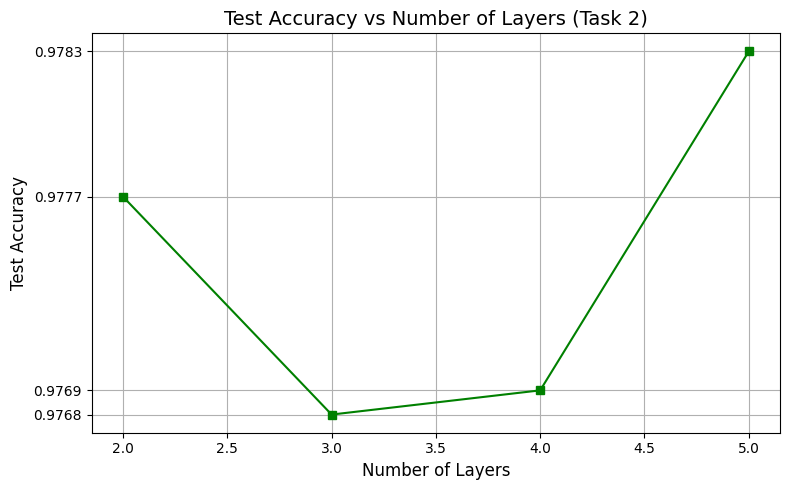


=== Task 2 Summary Table ===
   Number of Layers             Layer Sizes  Test Accuracy
0                 2               [512, 10]         0.9777
1                 3          [256, 128, 10]         0.9768
2                 4      [256, 128, 64, 10]         0.9769
3                 5  [256, 128, 64, 32, 10]         0.9783


In [ ]:
# Install TensorFlow if needed
# !pip install tensorflow

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.random import set_seed

# Set seeds for reproducibility
np.random.seed(42)
set_seed(42)

# Load and preprocess MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0
train_labels_cat = to_categorical(train_labels, 10)
test_labels_cat = to_categorical(test_labels, 10)

# Function to train model
def train_model(layer_sizes, epochs=5):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    for size in layer_sizes[:-1]:
        model.add(Dense(size, activation='relu'))
    model.add(Dense(layer_sizes[-1], activation='softmax'))
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(train_images, train_labels_cat, epochs=epochs, batch_size=128, verbose=0)
    _, test_accuracy = model.evaluate(test_images, test_labels_cat, verbose=0)
    return round(test_accuracy, 4)

# === Task 1: Vary first layer size and show custom axis labels ===
first_layer_sizes = [16, 32, 64, 128, 256, 512]
accuracies_task1 = []

for size in first_layer_sizes:
    acc = train_model([size, 10])
    accuracies_task1.append(acc)
    print(f"[Task 1] First Layer Size: {size} → Test Accuracy: {acc:.4f}")

# Plot Task 1 with x-axis showing number of neurons and y-axis showing accuracy values
plt.figure(figsize=(8, 5))
plt.plot(first_layer_sizes, accuracies_task1, marker='o', linestyle='-', color='blue')
plt.title("Test Accuracy vs First Layer Size (Task 1)", fontsize=14)
plt.xlabel("Number of Neurons in First Hidden Layer", fontsize=12)
plt.ylabel("Test Accuracy", fontsize=12)
plt.xticks(first_layer_sizes, labels=[str(s) for s in first_layer_sizes])
plt.yticks(accuracies_task1, labels=[str(a) for a in accuracies_task1])
plt.grid(True)
plt.tight_layout()
plt.show()

# === Task 2: Vary number of layers ===
layer_configs = {
    2: [512, 10],
    3: [256, 128, 10],
    4: [256, 128, 64, 10],
    5: [256, 128, 64, 32, 10]
}
accuracies_task2 = []

for num_layers, config in layer_configs.items():
    acc = train_model(config)
    accuracies_task2.append(acc)
    print(f"[Task 2] Number of Layers: {num_layers} → Layer Sizes: {config} → Test Accuracy: {acc:.4f}")

# Plot Task 2 with y-axis as accuracy values
plt.figure(figsize=(8, 5))
plt.plot(list(layer_configs.keys()), accuracies_task2, marker='s', linestyle='-', color='green')
plt.title("Test Accuracy vs Number of Layers (Task 2)", fontsize=14)
plt.xlabel("Number of Layers", fontsize=12)
plt.ylabel("Test Accuracy", fontsize=12)
plt.yticks(accuracies_task2, labels=[str(a) for a in accuracies_task2])
plt.grid(True)
plt.tight_layout()
plt.show()

# Task 2 Summary Table
summary_df = pd.DataFrame({
    "Number of Layers": list(layer_configs.keys()),
    "Layer Sizes": list(layer_configs.values()),
    "Test Accuracy": accuracies_task2
})

print("\n=== Task 2 Summary Table ===")
print(summary_df)


**Bashir bhia code below:**

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")
print(f"test_loss: {test_loss}")

In [ ]:
import matplotlib.pyplot as plt

# x axis values
x = [16,32,64,128,256,512]
# corresponding y axis values
y = [0.94220, 0.95329, 0.96759, 0.974799, 0.974699, 0.979799]

# plotting the points
plt.figure(figsize=(10,6))
plt.plot(x, y, color='green', linestyle='solid', linewidth = 2, marker='o', markerfacecolor='blue', markersize=8)

# setting x and y axis range
plt.xticks(x, x)
plt.yticks(y, y)
plt.xlim(1,550)
#plt.ylim(.5,1.2)

# naming the x axis
plt.xlabel('Size of First Layer')
# naming the y axis
plt.ylabel('Test Accuracy')

# giving a title to my graph
plt.title('Simple NN on MNIST data-set with two layers')

# function to show the plot
#plt.show()
plt.savefig('C:/Users/al.bashir/Desktop/My File/Spring 2023/CSCE 636/HW/HW1/BashirA_CSCE_636_HW1_1.pdf')
plt.savefig('C:/Users/al.bashir/Desktop/My File/Spring 2023/CSCE 636/HW/HW1/BashirA_CSCE_636_HW1_1.png')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[Task 1] First Layer Size: 16 → Test Accuracy: 0.9310
[Task 1] First Layer Size: 32 → Test Accuracy: 0.9558
[Task 1] First Layer Size: 64 → Test Accuracy: 0.9677
[Task 1] First Layer Size: 128 → Test Accuracy: 0.9709
[Task 1] First Layer Size: 256 → Test Accuracy: 0.9773
[Task 1] First Layer Size: 512 → Test Accuracy: 0.9765


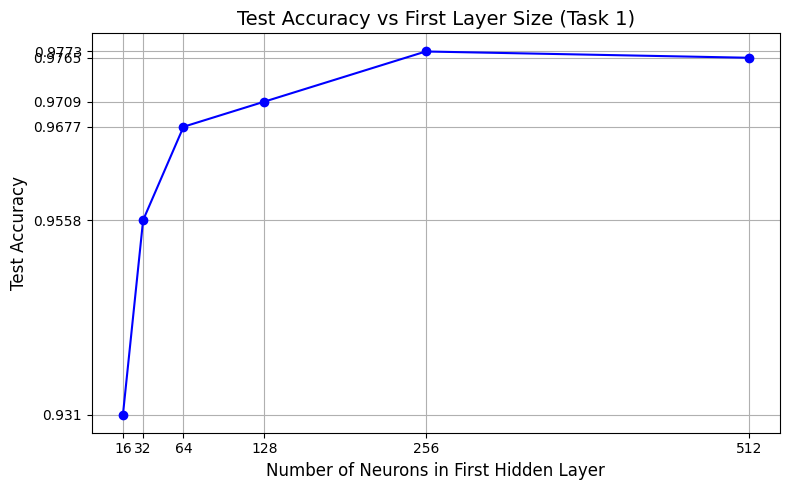

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[Task 2] Number of Layers: 2 → Layer Sizes: [512, 10] → Test Accuracy: 0.9770
[Task 2] Number of Layers: 3 → Layer Sizes: [256, 128, 10] → Test Accuracy: 0.9726
[Task 2] Number of Layers: 4 → Layer Sizes: [256, 128, 64, 10] → Test Accuracy: 0.9783
[Task 2] Number of Layers: 5 → Layer Sizes: [256, 128, 64, 32, 10] → Test Accuracy: 0.9756


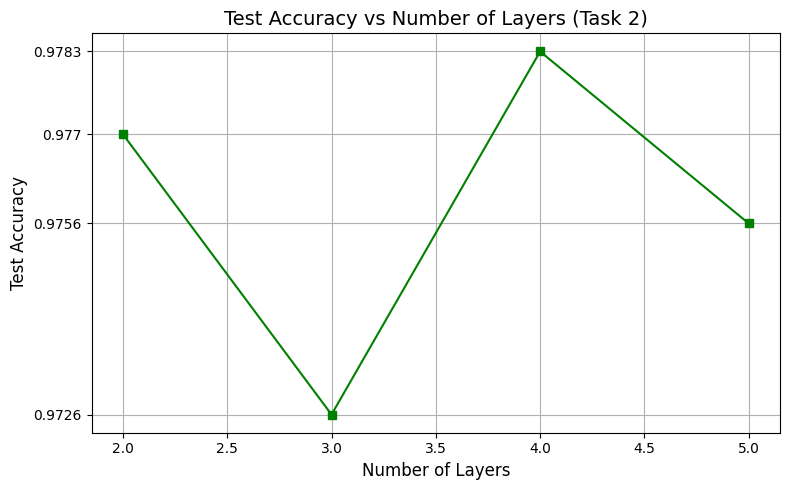


=== Task 2 Summary Table ===
   Number of Layers             Layer Sizes  Test Accuracy
0                 2               [512, 10]         0.9770
1                 3          [256, 128, 10]         0.9726
2                 4      [256, 128, 64, 10]         0.9783
3                 5  [256, 128, 64, 32, 10]         0.9756


In [ ]:
# Install TensorFlow if needed
# !pip install tensorflow

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.random import set_seed

# Set seeds for reproducibility
np.random.seed(42)
set_seed(42)

# Load and preprocess MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

# Function to train model
def train_model(layer_sizes, epochs=5):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    for size in layer_sizes[:-1]:
        model.add(Dense(size, activation='relu'))
    model.add(Dense(layer_sizes[-1], activation='softmax'))
    model.compile(optimizer=RMSprop(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(train_images, train_labels, epochs=epochs, batch_size=128, verbose=0)
    _, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
    return round(test_accuracy, 4)

# === Task 1: Vary first layer size and show custom axis labels ===
first_layer_sizes = [16, 32, 64, 128, 256, 512]
accuracies_task1 = []

for size in first_layer_sizes:
    acc = train_model([size, 10])
    accuracies_task1.append(acc)
    print(f"[Task 1] First Layer Size: {size} → Test Accuracy: {acc:.4f}")

# Plot Task 1 with x-axis showing number of neurons and y-axis showing accuracy values
plt.figure(figsize=(8, 5))
plt.plot(first_layer_sizes, accuracies_task1, marker='o', linestyle='-', color='blue')
plt.title("Test Accuracy vs First Layer Size (Task 1)", fontsize=14)
plt.xlabel("Number of Neurons in First Hidden Layer", fontsize=12)
plt.ylabel("Test Accuracy", fontsize=12)
plt.xticks(first_layer_sizes, labels=[str(s) for s in first_layer_sizes])
plt.yticks(accuracies_task1, labels=[str(a) for a in accuracies_task1])
plt.grid(True)
plt.tight_layout()
plt.show()

# === Task 2: Vary number of layers ===
layer_configs = {
    2: [512, 10],
    3: [256, 128, 10],
    4: [256, 128, 64, 10],
    5: [256, 128, 64, 32, 10]
}
accuracies_task2 = []

for num_layers, config in layer_configs.items():
    acc = train_model(config)
    accuracies_task2.append(acc)
    print(f"[Task 2] Number of Layers: {num_layers} → Layer Sizes: {config} → Test Accuracy: {acc:.4f}")

# Plot Task 2 with y-axis as accuracy values
plt.figure(figsize=(8, 5))
plt.plot(list(layer_configs.keys()), accuracies_task2, marker='s', linestyle='-', color='green')
plt.title("Test Accuracy vs Number of Layers (Task 2)", fontsize=14)
plt.xlabel("Number of Layers", fontsize=12)
plt.ylabel("Test Accuracy", fontsize=12)
plt.yticks(accuracies_task2, labels=[str(a) for a in accuracies_task2])
plt.grid(True)
plt.tight_layout()
plt.show()

# Task 2 Summary Table
summary_df = pd.DataFrame({
    "Number of Layers": list(layer_configs.keys()),
    "Layer Sizes": list(layer_configs.values()),
    "Test Accuracy": accuracies_task2
})

print("\n=== Task 2 Summary Table ===")
print(summary_df)
